Importing Libraries

In [53]:
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [54]:
from dotenv import load_dotenv
import os

load_dotenv()

APIKEY = os.getenv('API_KEY')

Coin Gecko API Requests

In [55]:
#Testing the Coin Gecko API: Making a request to fetch the prices of different coins from the past 90 days in USD


def fetch_data(crypto_id, currency='usd', days='90', apikey=APIKEY):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart?vs_currency={currency}&days={days}"

    headers = {
        "accept": "application/json",
        "x_cg_demo_api_key": apikey
    }

    response = requests.get(url, headers=headers)
    data = response.json()
    print("This is what the data from the request looks like in json format: ")
    print(data)
    prices = [price[1] for price in data['prices']]

    return prices

In [56]:
#Using the function to fetch the prices for bitcoin from the past 90 days

prices = fetch_data("bitcoin")
print(prices)

This is what the data from the request looks like in json format: 
{'prices': [[1728443370445, 62272.6586800959], [1728446989617, 62334.18871429603], [1728450038842, 62307.406121183434], [1728453735811, 62490.39392748502], [1728457735339, 62301.0120009861], [1728461019155, 62228.21482411327], [1728464933535, 62199.03458257609], [1728468213087, 62222.525571365324], [1728472323048, 62135.36928631705], [1728475730358, 62144.517600515544], [1728479286731, 61979.063023858784], [1728483059238, 61843.712560203414], [1728486875212, 61935.669410618335], [1728489898867, 62273.12429552298], [1728493501805, 61752.45976427412], [1728497307131, 61786.15413301724], [1728500750631, 61117.826773189954], [1728504027237, 61045.573897756294], [1728508297629, 60486.87709708697], [1728511772651, 60743.1844472768], [1728515611105, 60648.86752390266], [1728518773137, 60583.12205498274], [1728522070689, 60388.16814788513], [1728526335973, 60749.228818156014], [1728529640644, 60807.96354622658], [1728533571217,

Visualize The Data

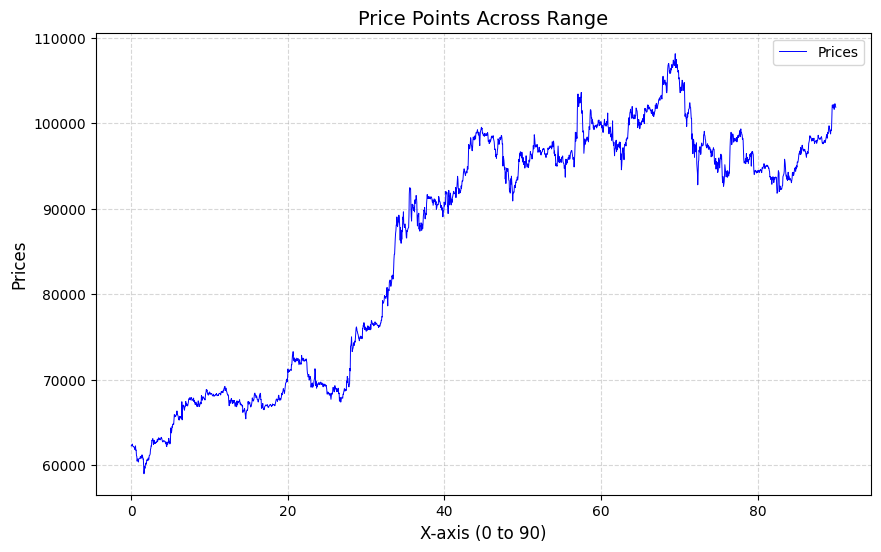

In [57]:
# Generate x values from 0 to 90, evenly spaced for 2160 points
x_values = np.linspace(0, 90, 2160)

# Plot the prices
plt.figure(figsize=(10, 6))
plt.plot(x_values, prices, label="Prices", color="blue", linewidth=0.7)

# Add labels, title, and grid
plt.title("Bitcoin Price over 90 days", fontsize=14)
plt.xlabel("Days (0 - 90)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.show()


Preprocessing the Data

In [62]:
def DataPreprocessing(prices, sequence_length = 30):

        #Use MinMax Scaler to feature scale the prices
                # This is a type of transformation used to shift and rescale values so that each value is on a scale between 0-1
                        # Useful for when you have different features with different scales and you want to make sure all have a similar range of numbers

        scaler = MinMaxScaler()

        #.reshape(-1, 1), you transform a 1D array of shape (length of prices,) into a 2D array of shape (length of prices, 1), turning it into a column vector
                # This is often useful when you're working with machine learning models or other algorithms that expect input in the form of 2D arrays or matrices.

        prices = np.array(prices).reshape(-1, 1)
        print("Prices after reshaping: ")
        print(prices)

        #Apply the Scaler to the data

        scaled_prices = scaler.fit_transform(prices)
        print("Prices after tranforming: ")
        print(scaled_prices)

        #To train the LSTM Model we use sequences of prices so that it can predict a target for that sequence
                #We are going to use every 30 prices to predict the 31st price in the sequence of prices

        sequences = []
        targets = []

        for i in range(len(scaled_prices) - sequence_length):
                sequences.append(scaled_prices[i:i + sequence_length])  #Uses list indexting to select the prices from [0, 29] with [30] as the target up until [prices_length - 30, prices_length] with [price_length] as the target
                targets.append(scaled_prices[i + sequence_length])
        
        #convert to numpy array and return
        return np.array(sequences), np.array(targets), scaler

In [66]:
bit_seq, bit_targ, bit_scaler = DataPreprocessing(prices)
print(bit_seq.shape[2])

Prices after reshaping: 
[[ 62272.6586801 ]
 [ 62334.1887143 ]
 [ 62307.40612118]
 ...
 [102245.0501354 ]
 [102015.3271748 ]
 [101869.41331445]]
Prices after tranforming: 
[[0.06624277]
 [0.06749553]
 [0.06695024]
 ...
 [0.88008588]
 [0.87540869]
 [0.87243787]]
1


Build and Train LSTM Model

In [ ]:
#Long Short-Term Memory Models
    # Type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data
    # Unlike traditional RNNs, LSTMs are equipped with a special architecture that includes memory cells and gates (input gate, forget gate, and output gate) to control the flow of information
    # This helps them remember information over longer periods and avoid the vanishing gradient problem.

def LSTM_Model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

2160

In [ ]:
def SVR_Model()
ann = keras.models.Sequential()
ann.add(keras.layers.Flatten(input_shape=(784, 1)))
ann.add(keras.layers.Dense(100, activation='relu'))
ann.add(keras.layers.Dense(10, activation='softmax'))